**ElasticNet Regression [Combination of L1 and L2 Regression]**

**(Code: Subhajit Das)**

**What is ElasticNet Regression?**

Elastic Net Regression, also known as ELNET, is a statistical method that combines two of the most often used regularized linear regression techniques, Lasso and Ridge¹. This hybrid method is used to deal with multicollinearity issues when they arise between predictor variables. Regularization aids in solving the overfitting issues with the models.

In Elastic Net, you don't have to choose between Ridge and Lasso models, because Elastic Net uses both the L2 (Ridge) and the L1 (Lasso) penalty⁴. Ridge utilizes an L2 penalty and Lasso uses an L1 penalty.

The estimates from the Elastic Net method are defined by a unique minimum due to the quadratic penalty term making the loss function strongly convex⁵. The Elastic Net method includes the LASSO and Ridge regression: each of them is a special case.

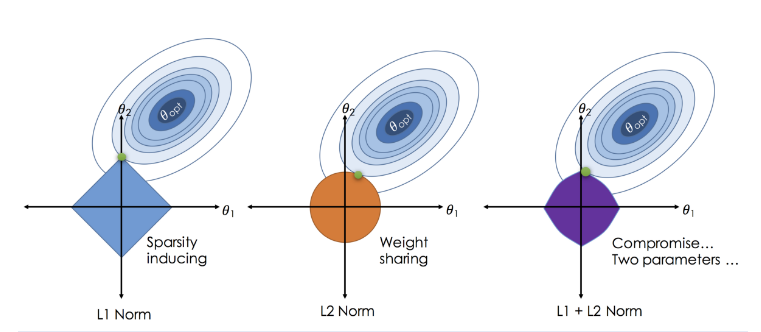

**Where we can use ElasticNet Regression?**

Elastic Net Regression has several applications in different fields:

1. **Bioinformatics**: Elastic Net Regression is used to identify genes that are associated with diseases or traits in genetic studies.
2. **Finance**: Elastic Net Regression is used to build models for predicting stock prices and other financial variables.
3. **Marketing**: Elastic Net Regression is used to identify the most important factors that influence customer behavior and preferences.

It's a great choice if you have a high-dimensional dataset and want to build a robust and accurate regression model.

**How ElasticNet Regression works:**

Sure, here's how Elastic Net Regression works, point by point:

1. **Combination of L1 and L2**: Elastic Net Regression is a regularized regression method that linearly combines the L1 and L2 penalties of the Lasso and Ridge methods.

2. **Variable Selection and Regularization**: It performs both variable selection and regularization which helps to enhance the prediction accuracy and interpretability of the statistical model it produces.

3. **Overcomes Limitations of Lasso**: Elastic Net overcomes the limitations of the Lasso (Least Absolute Shrinkage and Selection Operator) method which uses a penalty function based on absolute values.

4. **Useful for Correlated Features**: It is particularly useful when dealing with datasets where features are correlated.

5. **Procedure of Regularization**: In the procedure of regularization with an Elastic Net, first, we find the coefficient of ridge regression. After this, we perform a lasso algorithm on the ridge regression coefficient to shrink the coefficient.

6. **Extension of Linear Regression**: Elastic Net is an extension of linear regression that adds regularization penalties to the loss function during training. These penalties encourage simpler models that have smaller coefficient values.

7. **Combines L1 and L2 Penalties**: Elastic Net combines two popular penalties, specifically the L1 and L2 penalty functions.

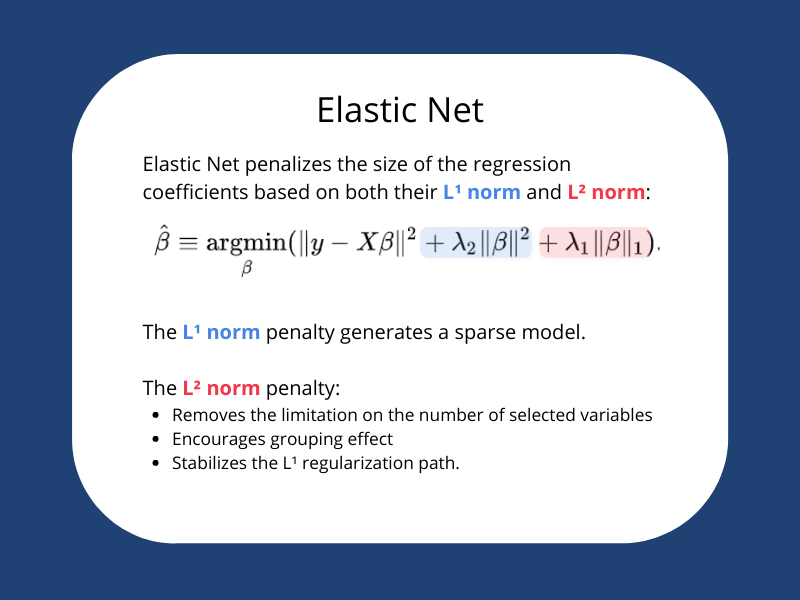

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Auto-mpg Dataset**

In [ ]:
auto_df = pd.read_csv("/content/drive/MyDrive/ML and DL DataSets/13_auto-mpg.csv")
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
auto_df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


**Data Cleaning (Horsepower)**

In [ ]:
# Viwing the abnormal horsepower data
auto_df[auto_df.horsepower.str.isdigit()==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [ ]:
# Replace ? with nan
# Replaces all instances of ‘?’ in the ‘horsepower’ column with np.nan (which stands for ‘Not a Number’ and is used to denote missing values)
auto_df['horsepower'] = auto_df['horsepower'].replace('?', np.nan)

In [ ]:
# Filling with median value
auto_df['horsepower'] = auto_df['horsepower'].fillna(auto_df['horsepower'].median())

In [ ]:
# Viewing the dataset
auto_df.head(6)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500


**Correlation Matrix**

<Axes: >

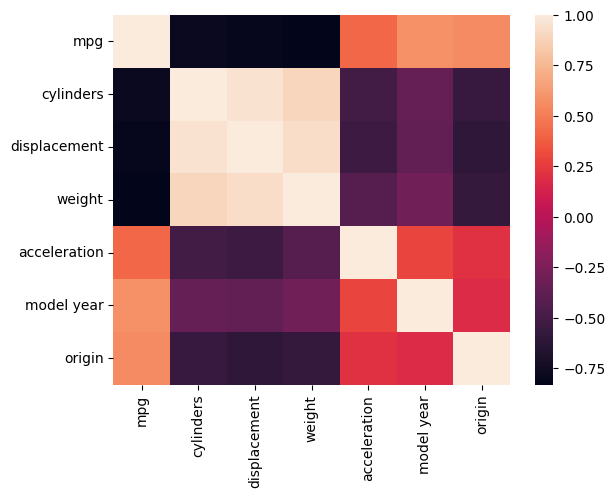

In [ ]:
# Building the Correlation Matrix
# Creating a heatmap of the correlation matrix of the DataFrame. This can be very useful for visualizing the relationships between different variables in the DataFrame.
sns.heatmap(auto_df.corr(numeric_only=True)) # More closer to 1, it denotes more connection or correlation

In [ ]:
auto_df.corr(numeric_only=True)

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


**Data Visualizations**

In [ ]:
from mlxtend.plotting import scatterplotmatrix

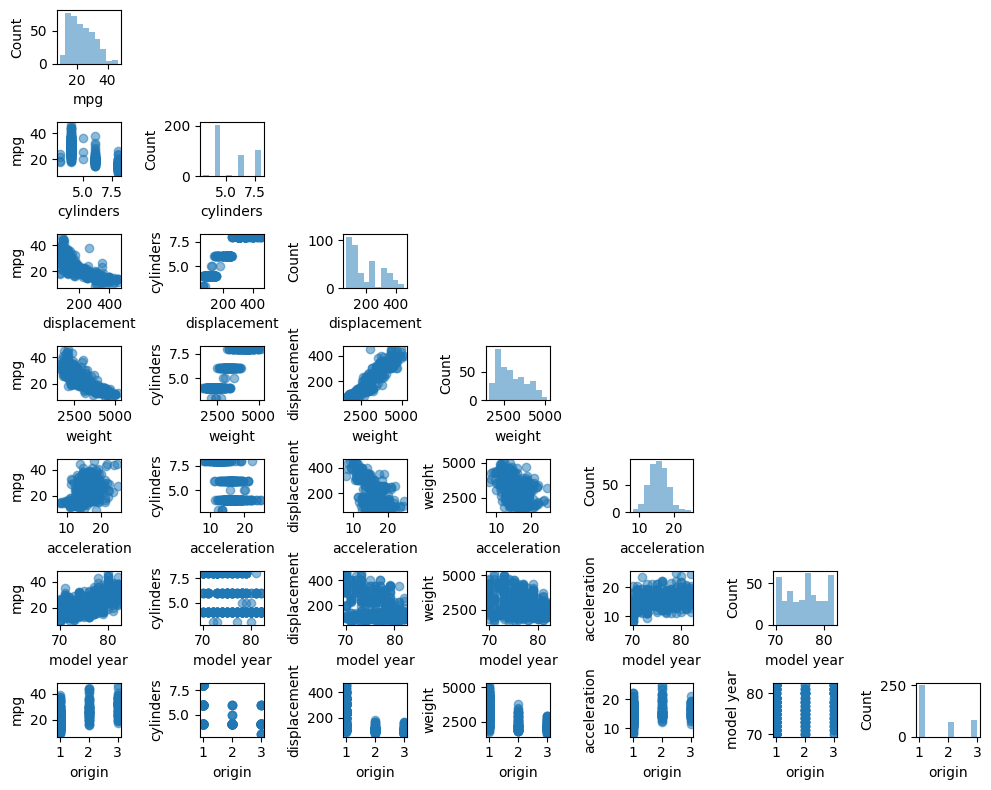

In [ ]:
cols = ['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'model year', 'origin']

scatterplotmatrix(auto_df[cols].values,
                  figsize = (10,8),
                  names = cols,
                  alpha=0.5)

plt.tight_layout()
plt.show()

**Separating features and labels**

In [ ]:
x = auto_df.drop(['mpg', 'car name'], axis = 1)
x.tail()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
393,4,140.0,86,2790,15.6,82,1
394,4,97.0,52,2130,24.6,82,2
395,4,135.0,84,2295,11.6,82,1
396,4,120.0,79,2625,18.6,82,1
397,4,119.0,82,2720,19.4,82,1


In [ ]:
y = auto_df['mpg']
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

**Scaling the data**

In [ ]:
# The preprocessing.scale function in the sklearn.preprocessing module is used to standardize a dataset along any axis
''' This function is helpful with largely sparse datasets. It subtracts the mean and divides by the standard deviation of your dataset along a given axis.
     This brings all your values onto one scale, eliminating the sparsity. It follows the same concept of Normalization and Standardization '''
from sklearn import preprocessing

In [ ]:
# Scaling the columns of data
x_scaled = preprocessing.scale(x)

y_scaled = preprocessing.scale(y)

**Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

**Using ElasticNet Regression Model**

**Parameters used in ElasticNet Regression:**

The parameters used in ElasticNet Regression include:
1. **Dependent Variable (Y)**: This is the variable that we want to predict or forecast.
2. **Independent Variables (X)**: These are the variables that we use to predict or forecast the dependent variable.
3. **Intercept (b0)**: This is the predicted value of Y when X is 0.
4. **Slope (b1)**: This is the regression coefficient, which represents the change in the dependent variable for a unit change in the independent variable.
5. **Error Term (ϵ)**: This is the difference between the observed and predicted values.
6. **alpha**: This is a regularization parameter that controls the strength of the penalty term.
7. **l1_ratio**: The ElasticNet mixing parameter, with 0 <= l1_ratio <= 1. For l1_ratio = 0 the penalty is an L2 penalty. For l1_ratio = 1 it is an L1 penalty. For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2.
8. **fit_intercept**: This specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.
9. **normalize**: This parameter is used to normalize the input variables (X) before regression.
10. **copy_X**: This parameter is used to copy the input variables (X). If False, the input variables may be overwritten during the normalization process.
11. **max_iter**: This is the maximum number of iterations for the solver to converge.
12. **tol**: This is the tolerance for the solution.
13. **warm_start**: When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution.
14. **positive**: When set to True, forces the coefficients to be positive.
15. **random_state**: This parameter is used for shuffling the data.
16. **selection**: If set to ‘random’, a random coefficient is updated every iteration rather than looping over features sequentially by default.

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
enet = ElasticNet(alpha = 0.4)

In [ ]:
# Fit the model
enet.fit(x_train, y_train)

ElasticNet(alpha=0.4)

In [ ]:
y_test.head(8)

350    34.7
385    38.0
395    32.0
39     14.0
174    18.0
22     25.0
157    15.0
70     13.0
Name: mpg, dtype: float64

In [ ]:
y_pred = enet.predict(x_test)
print(y_pred)

[31.71938448 34.76031695 31.73446848  9.53633228 22.0607616  22.75680066
 12.71912023 10.52238146 11.61570168 25.50183819 23.11128833 30.89030326
 21.09388225 14.32960892  8.96694918 22.21386708 15.56216318 11.77046595
 25.72305198 25.1931667  19.77684225 29.9794999  25.22500208 28.61674857
 33.07766061 34.67291142 32.5279695  23.07930394 26.54694555 24.96614985
 23.89997944 30.87922794 23.53990958 17.99058325 31.07563842  4.8432293
 12.99789264 27.30075754 27.05281622 21.16946397 22.80071895 15.20681041
 26.65696857 29.27043844 23.6273808   8.66367379  9.63227863 28.5533047
 16.22890369 14.2440566  20.32035355 31.97813084 34.06745845 16.43217342
 19.83629333 27.79510068 13.31736229 21.5147987  29.18236002  9.9504093
  9.42961264 20.97126798 31.30114707 26.07614085 23.78002936 22.47003397
 12.70125692 32.44759809 29.1751293  17.30707536 12.08699073  6.57515201
  5.94838945 26.88642405 25.53314427 10.45743838 32.56338221 26.63538603
 24.84476103 23.86136475 25.42367647 24.99213639 28.29

In [ ]:
# Finding m / slope of line
for m, col_name in enumerate(x_train):
    print("ElasticNet model coefficient for {} is {}".format(col_name, enet.coef_[m])) # 0 means that feature is not so much corelated in this model

ElasticNet model coefficient for cylinders is 0.0
ElasticNet model coefficient for displacement is 0.006904678090378748
ElasticNet model coefficient for horsepower is -0.007643613836506993
ElasticNet model coefficient for weight is -0.006990519827903805
ElasticNet model coefficient for acceleration is 0.06497684229050019
ElasticNet model coefficient for model year is 0.7421247130161781
ElasticNet model coefficient for origin is 0.40183172175071974


In [ ]:
# Finding y_intercept of model
c = enet.intercept_
print('The y_intercept of this ElasticNet Regression is {}'.format(c))

The y_intercept of this ElasticNet Regression is -14.522146052349388


**Getting the Score**

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# Viewing the ElasticNet Regression Score
print(enet.score(x_train, y_train))
print(enet.score(x_test, y_test))

0.8040291182124079
0.8318458236398784


In [ ]:
# Calculating MSE and RMSE
# The lower the MSE, the better the model’s predictions match the actual values.
print(mean_squared_error(y_test, y_pred)) # MSE 9.841823535225 indicates the avG of the squares of the errors (the avg squared difference between the estimated and actual values) in your model.
print(np.sqrt(mean_squared_error(y_test, y_pred))) # Square of MSE

10.87500515366235
3.297727270964406
